In [2]:
import os
import os.path as osp
from skimage.measure import find_contours
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

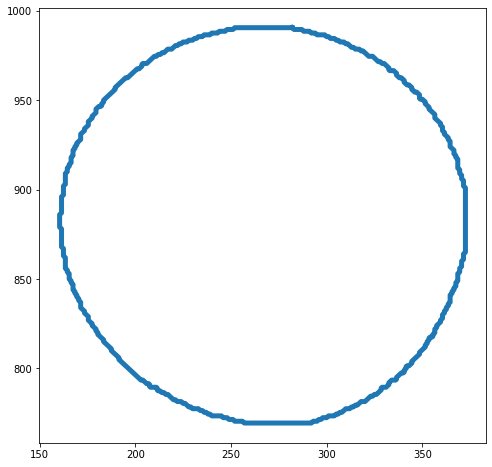

In [3]:
root = 'C:/Users/lolitazhang/Desktop/DATA/Refuge/source/eyesgan/labels'
save =  'C:/Users/lolitazhang/Desktop/DATA/Refuge/source/eyesgan/contour_cup'
filelist = os.listdir(root)
for file in filelist[:1]:
    img = Image.open(os.path.join(root, file))
    s = np.asarray(img, np.float32)
    s_copy = np.zeros(s.shape, dtype=np.float32)
    ind = {0: 1, 128: 0, 255: 0}
    for k, v in ind.items():
        s[s == k] = v
    contours = find_contours(s, 0.5)
    #print(contours[0][0][0],contours[0][0][1])
    fig, ax = plt.subplots(figsize=(8,8))
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=5)
    plt.show()
    for i in range(contours[0].shape[0]):
        s_copy[int(contours[0][i][0])][int(contours[0][i][1])] = 255
    img = np.asarray(s_copy, np.float32)
    img = Image.fromarray(img.astype(np.uint8))
    img.save(os.path.join(save, file))

In [ ]:
root = 'C:/Users/lolitazhang/Desktop/DATA/Refuge/source/labels'
save = 'C:/Users/lolitazhang/Desktop/DATA/Refuge/source/level_0.3-0.4/noise_labels_400'
filelist = os.listdir(root)
for i in range(250,300):
    file = filelist[i]
    print(i,file)
    gt_mask = Image.open(os.path.join(root,file))
    gt_mask = np.asarray(gt_mask, np.float32)
    id_mask = np.asarray(gt_mask, np.float32)

    mask_to_id = {0 : 0, 128 : 1, 255:2}
    for k, v in mask_to_id.items():
        id_mask[gt_mask == k] = v
    cup_mask = get_bool(id_mask, 0)
    disc_mask = get_bool(id_mask, 0) + get_bool(id_mask, 1)     
    #disc_mask = morphology.binary_erosion(disc_mask, morphology.disk(40)).astype(np.uint8)  # return 0,1 #[10,20], [20,40]
    cup_mask = morphology.binary_erosion(cup_mask, morphology.disk(20)).astype(np.uint8)  # return 0,1 #[10,20],[20,30]
    #disc_mask = morphology.binary_dilation(disc_mask, morphology.disk(20)).astype(np.uint8)  # return 0,1 # [10,20],[20,40]
    #cup_mask = morphology.binary_dilation(cup_mask, morphology.disk(20)).astype(np.uint8)  # return 0,1 # [10,20],[20,40]
    output_mask = disc_mask + cup_mask
    output_mask[output_mask ==2] =3
    output_mask[output_mask ==0] =2
    output_mask[output_mask ==3] =0
    id_to_mask = {0 : 255,1 : 128, 2 : 0 }
    for k, v in mask_to_id.items():
        output_mask[output_mask == v] = k
        gt_mask[gt_mask == v] = k
    print(np.unique(output_mask))
    print(np.unique(gt_mask))
    plt.figure(figsize = (10,10))
    plt.subplot(221)
    plt.imshow(cup_mask,cmap='gray')
    plt.subplot(222)
    plt.imshow(disc_mask,cmap='gray')
    plt.subplot(223)
    plt.imshow(gt_mask,cmap='gray')
    plt.subplot(224)
    plt.imshow(output_mask,cmap='gray')
    s = np.asarray(img, np.float32)
    s_copy = np.zeros(s.shape, dtype=np.float32)
    ind = {0: 1, 128: 0, 255: 0}
    for k, v in ind.items():
        s[s == k] = v
    contours = find_contours(s, 0.5)
    #print(contours[0][0][0],contours[0][0][1])
    fig, ax = plt.subplots(figsize=(8,8))
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=5)

    plt.show() 
    disc_dice, cup_dice = calculate_dice(gt_mask, output_mask)
    print(disc_dice, cup_dice)
    print('noise ratio:',2-disc_dice-cup_dice)
    output_mask = Image.fromarray(output_mask.astype(np.uint8))
    output_mask.save(os.path.join(save,file.split('.')[0]+'.bmp'))
    with open(os.path.join(save,'noise_label.txt'),"a") as f:
        f.write(file.split('.')[0]+'_erosion_cup.bmp' + '\n')

In [ ]:
# Plot pictures and misleading labels
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure,draw 
root = 'C:/Users/lolitazhang/Desktop/DATA/Refuge/source'
file = ['n0039','n0199','g0002','n0155']
img = Image.open(os.path.join(root, 'images', file[1]+'.jpg'))
label = Image.open(os.path.join(root, 'labels', file[1]+'.bmp'))
deform_label1 = deform(label, mode = 'dilation',part=1)
deform_label2 = deform(label, mode = 'dilation',part=2)
deform_label3 = deform(label, mode = 'dilation',part=3)
label = np.asarray(label, np.float32)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(deform_label1,plt.cm.gray)
ax2.imshow(deform_label2,plt.cm.gray)
ax3.imshow(deform_label3,plt.cm.gray)

#绘制轮廓
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))
# ax0.imshow(erosion_label,plt.cm.gray)
# ax0.set_xticks([])
# ax0.set_yticks([])
ax1.imshow(img,plt.cm.gray)
ax2.imshow(img,plt.cm.gray)
ax3.imshow(img,plt.cm.gray)
ax4.imshow(img,plt.cm.gray)
#检测cup的轮廓
contours = measure.find_contours(label, 0.5)
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2,color='darkblue')
#检测disc的轮廓
ind = {128: 0}
for k, v in ind.items():
    label[label == k] = v
contours = measure.find_contours(label, 0.5)    
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2,color='darkred')    
ax1.axis('image')
ax1.set_xticks([])
ax1.set_yticks([])

#检测cup的轮廓
contours = measure.find_contours(deform_label1, 0.5)
for n, contour in enumerate(contours):
    ax2.plot(contour[:, 1], contour[:, 0], linewidth=2,color='lightblue')
#检测disc的轮廓
ind = {128: 0}
for k, v in ind.items():
    deform_label1[deform_label1 == k] = v
contours = measure.find_contours(deform_label1, 0.5)    
for n, contour in enumerate(contours):
    ax2.plot(contour[:, 1], contour[:, 0], linewidth=2,color='red')
    
ax2.axis('image')
ax2.set_xticks([])
ax2.set_yticks([])

#检测cup的轮廓
contours = measure.find_contours(deform_label2, 0.5)
for n, contour in enumerate(contours):
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=2,color='lightblue')
#检测disc的轮廓
ind = {128: 0}
for k, v in ind.items():
    deform_label2[deform_label2 == k] = v
contours = measure.find_contours(deform_label2, 0.5)    
for n, contour in enumerate(contours):
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=2,color='red')

ax3.axis('image')
ax3.set_xticks([])
ax3.set_yticks([])

#检测cup的轮廓
contours = measure.find_contours(deform_label3, 0.5)
for n, contour in enumerate(contours):
    ax4.plot(contour[:, 1], contour[:, 0], linewidth=2,color='lightblue')
#检测disc的轮廓
ind = {128: 0}
for k, v in ind.items():
    deform_label3[deform_label3 == k] = v
contours = measure.find_contours(deform_label3, 0.5)    
for n, contour in enumerate(contours):
    ax4.plot(contour[:, 1], contour[:, 0], linewidth=2,color='red')

ax4.axis('image')
ax4.set_xticks([])
ax4.set_yticks([])
plt.show()